In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X = iris['data']
y = iris['target']

y_new = keras.utils.to_categorical(y, num_classes = 3)
# assert y_new.shape == (150, 3)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_new, test_size= 0.20)

In [14]:
X.shape[1]

4

In [29]:
# Model architecture
model = Sequential()
model.add(Input(shape= X.shape[1:]))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(10, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation= 'softmax'))



In [30]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile('adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

h = model.fit(x_train, y_train, batch_size= 5, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3109 - loss: 4.8268
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2553 - loss: 4.5333
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2983 - loss: 2.9348
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3588 - loss: 2.0781
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3454 - loss: 1.8366
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4617 - loss: 1.2045
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2184 - loss: 1.2696
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4309 - loss: 1.0764
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5786 - loss: 0.8711
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5774 - loss: 0.8566
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6241 - loss: 0.8146
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [37]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4333 - loss: 5.0829


[5.082879066467285, 0.4333333373069763]

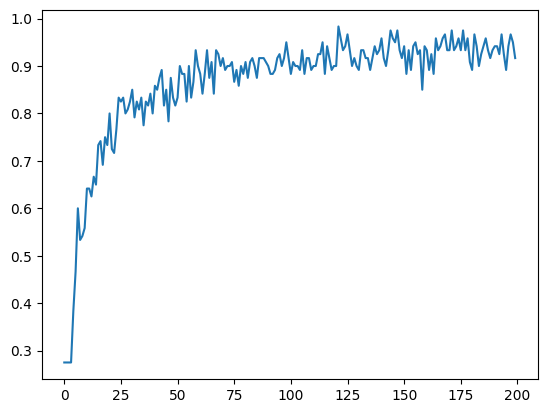

In [36]:
plt.plot(h.history['accuracy'])

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [34]:
model.compile('Adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

h = model.fit(x_train_sc, y_train, batch_size= 5, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2672 - loss: 1.4313
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2472 - loss: 1.3145
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2981 - loss: 1.2023
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2996 - loss: 1.0881
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3652 - loss: 1.0075
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4038 - loss: 1.0073
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6144 - loss: 0.8979
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5238 - loss: 0.8713
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5556 - loss: 0.8359
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5339 - loss: 0.8762
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7375 - loss: 0.6938
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [38]:
model.evaluate(x_test_sc, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9333 - loss: 0.1338


[0.13382187485694885, 0.9333333373069763]

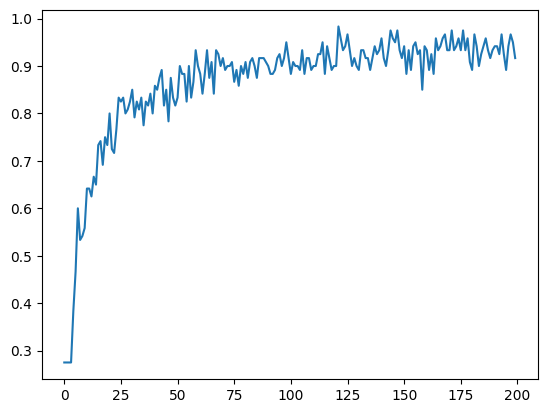

In [39]:
plt.plot(h.history['accuracy'])

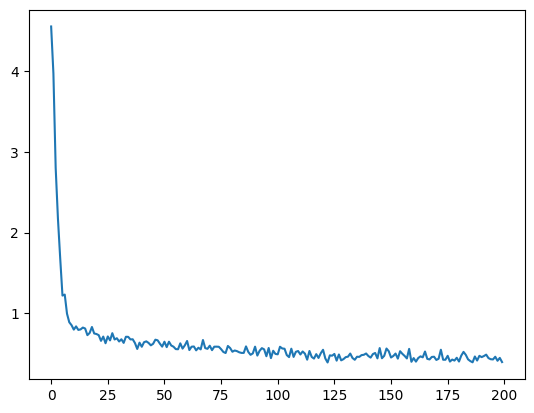

In [31]:
plt.plot(h.history['loss'])